<a href="https://colab.research.google.com/github/CHIKU1799/Netflix-Case-Web-Scaping-Using-Google-API/blob/main/Netflix_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Netflix_2015_logo.svg/1280px-Netflix_2015_logo.svg.png" alt="Netflix Logo" width="200"/>

# Business Scenario: Analyzing Audience Sentiment for Netflix Releases

**Context:** Netflix, a leading streaming service, is planning its movie releases for the upcoming year. Understanding audience sentiment towards their content is crucial for strategizing marketing campaigns, optimizing content acquisition, and improving user engagement.

**Problem Statement:** Analyze YouTube comments related to Netflix movie trailers and announcements to gauge public sentiment (positive/negative). This sentiment analysis will help Netflix identify potential hits and misses, understand audience expectations, and proactively address negative feedback to enhance the success of their new releases.

#**Data Scapping from Youtube:**

In [ ]:
pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
pip install --upgrade google-api-python-client google-auth google-auth-oauthlib google-auth-httplib2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.6 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.155.0
    Uninstalling google-api-python-client-2.155.0:
      Successfully uninstalled google-api-python-client-2.155.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.27.0, but you have google-auth 2.38.0 which is incompatible.


In [ ]:
!pip install nltk


In [ ]:
import pandas as pd
import nltk
from googleapiclient.discovery import build
from google.colab import files
from nltk.sentiment import SentimentIntensityAnalyzer

# 🔹 Download VADER Lexicon for Sentiment Analysis
nltk.download('vader_lexicon')

# ✅ Replace with your API Key & Video ID
API_KEY = "xx"
VIDEO_ID = "xx"

# ✅ 1. Function to Get Comments from YouTube
def get_comments(video_id, max_results=100):
    youtube = build("youtube", "v3", developerKey=API_KEY)
    comments_data = []
    next_page_token = None

    while len(comments_data) < max_results:
        response = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100,
            pageToken=next_page_token
        ).execute()

        for item in response["items"]:
            comment = item["snippet"]["topLevelComment"]["snippet"]
            comment_id = item["snippet"]["topLevelComment"]["id"]
            user_name = comment["authorDisplayName"]
            date = comment["publishedAt"]
            text = comment["textDisplay"]
            comments_data.append([comment_id, user_name, date, text])

        next_page_token = response.get("nextPageToken")
        if not next_page_token:
            break

    return comments_data

# ✅ 2. Sentiment Analysis Function
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)['compound']  # Get compound score

    # Classify as Good (1) or Bad (0)
    if sentiment_score >= 0:
        return 0  # Ham comment
    else:
        return 1  # Spam comment

# ✅ 3. Get YouTube Comments & Classify Sentiment
comments_data = get_comments(VIDEO_ID, max_results=100)

# Extract required details
comment_ids = [data[0] for data in comments_data]
usernames = [data[1] for data in comments_data]
dates = [data[2] for data in comments_data]
comments = [data[3] for data in comments_data]

# Classify sentiment for each comment
sentiment_labels = [analyze_sentiment(comment) for comment in comments]

# ✅ 4. Save Results to CSV with Required Columns
df = pd.DataFrame({
    "COMMENT_ID": comment_ids,
    "AUTHOR": usernames,
    "DATE": dates,
    "CONTENT": comments,
    "CLASS": sentiment_labels
})

df.to_csv("youtube_sentiment_analysis_with_class.csv", index=False)
files.download("youtube_sentiment_analysis_with_class.csv")

print("✅ Sentiment classification with required columns completed. Check your CSV file.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Sentiment classification with required columns completed. Check your CSV file.


**Note:** Video url: https://www.youtube.com/watch?v=ABC123xyz
Video ID: ABC123xyz

In [ ]:
import os
import pandas as pd

# Define the folder path containing your CSV files
folder_path = r'/content/sample_data/youtube_dataset'  # Change this to your folder path

# Define the old and new years to replace
old_years = ['2013', '2014', '2015', '2016']  # Renamed to old_years for clarity
new_year = '2024'

# Loop through all CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Check for CSV files
        file_path = os.path.join(folder_path, file_name)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Check if the 'DATE' column exists
        if 'DATE' in df.columns:
            # Replace old years with new year in the 'DATE' column
            # Iterate through each old year and replace it if found
            for old_year in old_years:
                df['DATE'] = df['DATE'].str.replace(old_year, new_year)

            # Write the updated DataFrame back to the CSV file
            df.to_csv(file_path, index=False)

        print(f"Updated dates in {file_name}")

Updated dates in Youtube05.csv
Updated dates in Youtube03.csv
Updated dates in Youtube01.csv
Updated dates in Youtube04.csv
Updated dates in Youtube02.csv


# **Multinomial Naive Bayes Classifer: HAM/SPAM Classifer**


Link for data: https://drive.google.com/drive/folders/1d8MLYzDEBXBELrb_vEh2WlaYabiHRYGZ?usp=drive_link

Go to this link and save it in your google drive.

**Importing the necessary libraries**

In [ ]:
import pandas as pd
import glob
#what is pandas?
#what is sklearn?
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

### Mounting Google drive to directly access the folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
folder_path='/content/drive/MyDrive/youtube-dataset/'


### **glob: Use case**

In [ ]:
files = glob.glob(folder_path + "*.csv")
files

['/content/drive/MyDrive/youtube-dataset/Youtube05.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube01.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube02.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube03.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube04.csv',
 '/content/drive/MyDrive/youtube-dataset/Youtube000.csv']

In [ ]:
all_df = []

for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1))

In [ ]:
all_df[1]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [ ]:
len(all_df)

6

In [ ]:
data = pd.concat(all_df, axis=0, ignore_index=True)
data

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0
...,...,...
2050,Mandala murder delhi crime 3 and kohra 2 and t...,1
2051,Delhi crime is back 🔥,1
2052,Jeet,0
2053,Did I see Radhika apte?,0


In [ ]:
data.isnull().sum()

,0
CONTENT,0
CLASS,0


In [ ]:
data['CLASS'].value_counts()


,count
CLASS,
0,1038
1,1017


### Defining the inputs and the target. Creating the train-test split.

In [ ]:
inputs = data['CONTENT']
target = data['CLASS']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=365,
                                                    stratify = target)

In [ ]:
y_train.value_counts()

,count
CLASS,
0,830
1,814


In [ ]:
y_test.value_counts()

,count
CLASS,
0,208
1,203


SAMPLE

In [ ]:
message_sample = ['This is a dog']
# msg_sample3=['This  bbadass']

vectorizer_sample = CountVectorizer()

vectorizer_sample.fit(message_sample)

CountVectorizer()

In [ ]:
vectorizer_sample.transform(message_sample).toarray()
# vectorizer_sample.transform(msg_sample3).toarray()

array([[1, 1, 1]])

In [ ]:
vectorizer_sample2=CountVectorizer()
vectorizer_sample2.fit_transform(['This is a cat']).toarray()

array([[1, 1, 1]])

In [ ]:
message_sample2= ['this is a cat', 'This is a cat']
vectorizer_sample3=CountVectorizer()
vectorizer_sample3.fit_transform(message_sample2).toarray()

array([[1, 1, 1],
       [1, 1, 1]])

### Tokenization

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [ ]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train_transf.shape

(1644, 4024)

In [ ]:
x_test_transf.shape

(411, 4024)

### Performing the classification

In [ ]:
clf = MultinomialNB()
# clf = MultinomialNB(class_prior = np.array([0.6, 0.4]),fit_prior=False)

clf.fit(x_train_transf, y_train)

MultinomialNB()

In [ ]:
np.exp(clf.class_log_prior_)

array([0.50486618, 0.49513382])

In [ ]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [ ]:
y_test_pred = clf.predict(x_test_transf)

### Performing the evaluation on the test dataset

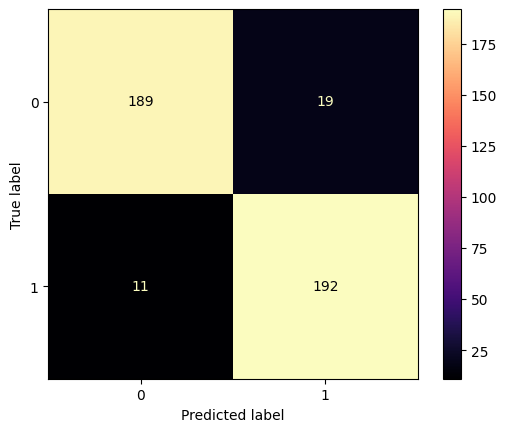

In [ ]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.94      0.91      0.93       208
        Spam       0.91      0.95      0.93       203

    accuracy                           0.93       411
   macro avg       0.93      0.93      0.93       411
weighted avg       0.93      0.93      0.93       411



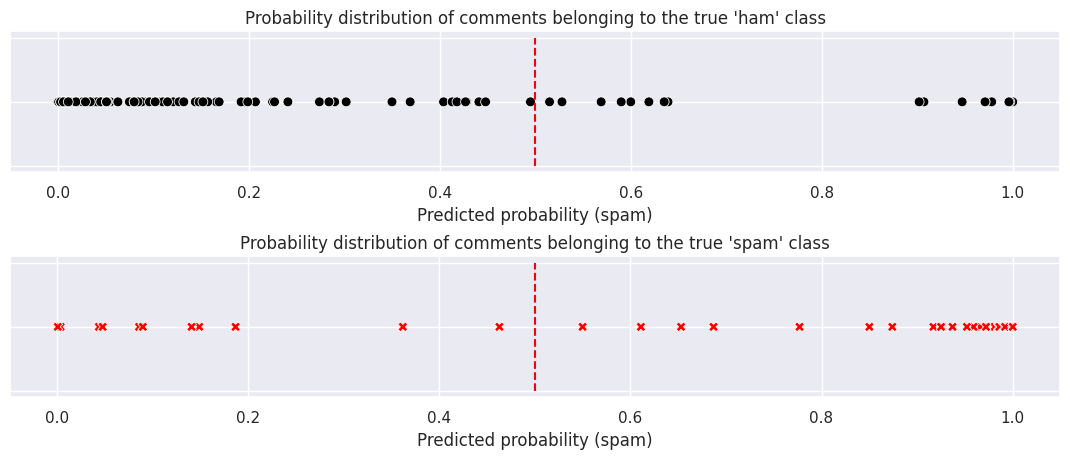

In [ ]:
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_0.shape[0]),
                data = df_scatter_0,
                hue = 'True class',
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False,
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_1.shape[0]),
                hue = 'True class',
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False,
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

In [ ]:
predict_data = vectorizer.transform(['This announcement looks amazing, Good job Netflix!',
                                     'You can win 1m dollars right now, just click here!!!'])

In [ ]:
clf.predict(predict_data)

array([0, 1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalMaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam

# --- Data Preparation: Tokenization and Padding ---
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Tokenization (creating vocabulary)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
# Replacing X_train with x_train to use the correct variable name
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

# Step 2: Convert words to lists of index
# Replacing X_train with x_train, and X_test with x_test to use the correct variable names
X_train_sequences = tokenizer.texts_to_sequences(x_train)
X_test_sequences = tokenizer.texts_to_sequences(x_test)

# Step 3: Padding
max_len = 200  # Set based on your data analysis
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, truncating='post', padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, truncating='post', padding='post')

# --- Model Building ---
embedding_dim = 32  # Dimensionality of word embeddings

# Create the model
model = Sequential([
    Embedding(input_dim=len(word_index)+1, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=True),  # Captures sequential relationships
    GlobalMaxPooling1D(),          # Summarizes the sequence
    Dense(24, activation='relu'),   # Connects information from LSTM to output
    Dropout(0.2), #Adding drop out for preventing weights to be too large
    Dense(1, activation='sigmoid')   # Spam/Ham output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adam Optimizer
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train,
                    epochs=10,
                    validation_data=(X_test_padded, y_test))


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - accuracy: 0.6090 - loss: 0.6696 - val_accuracy: 0.8564 - val_loss: 0.3922
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.8681 - loss: 0.3808 - val_accuracy: 0.8394 - val_loss: 0.4070
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9153 - loss: 0.2827 - val_accuracy: 0.8662 - val_loss: 0.3495
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9205 - loss: 0.2532 - val_accuracy: 0.8686 - val_loss: 0.2927
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.9672 - loss: 0.1267 - val_accuracy: 0.8929 - val_loss: 0.2907
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.9787 - loss: 0.0939 - val_accuracy: 0.9197 - val_loss: 0.2817
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9874 - loss: 0.0637 - val_accuracy: 0.8735 - val_loss: 0.3683
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 0.9867 - loss: 0.0546 - val_accuracy

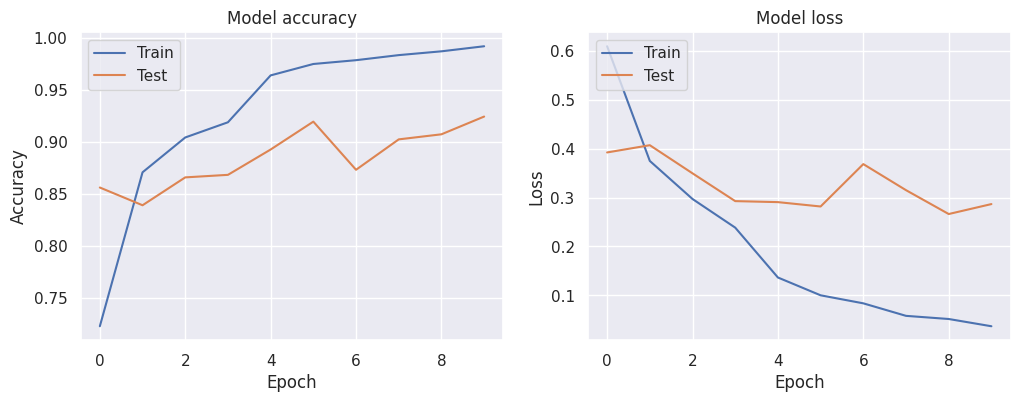

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


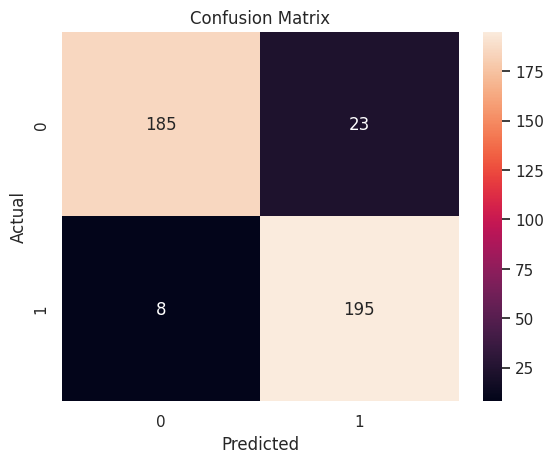

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       208
           1       0.89      0.96      0.93       203

    accuracy                           0.92       411
   macro avg       0.93      0.93      0.92       411
weighted avg       0.93      0.92      0.92       411



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'x_test' contains your raw test data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)  # Fit on training data for consistent vocabulary
X_test_sequences = tokenizer.texts_to_sequences(x_test)
max_len = 200  # Use the same max_len as during training
x_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, truncating='post', padding='post')

# Get predictions from the model
y_pred = (model.predict(x_test_padded) > 0.5).astype("int32")
y_pred
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_pred))



In [ ]:
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_0.shape[0]),
                data = df_scatter_0,
                hue = 'True class',
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False,
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_1.shape[0]),
                hue = 'True class',
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False,
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

NameError: name 'clf' is not defined